# MNIST PCA Compression

In [4]:
import sys  
!{sys.executable} -m pip install --user scikit-learn

In [5]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [6]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# How much do we want to compress?
perc = 0.9

In [29]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= perc) + 1

In [30]:
# Number of dimentions required to  preserve the amount of data
d

87

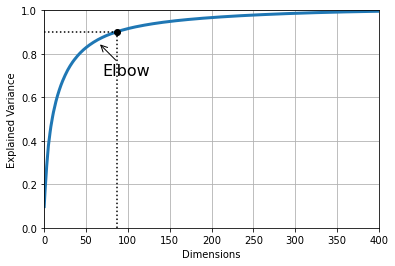

In [31]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, perc], "k:")
plt.plot([0, d], [perc, perc], "k:")
plt.plot(d, perc, "ko")
plt.annotate("Elbow",
             xy=(65, 0.85),
             xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"),
             fontsize=16)
plt.grid(True)
plt.show()

In [32]:
pca = PCA(n_components=perc)
X_reduced = pca.fit_transform(X_train)

In [33]:
pca.n_components_

87

In [34]:
np.sum(pca.explained_variance_ratio_)

0.9006247070716766

In [35]:
pca = PCA(n_components = d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [36]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

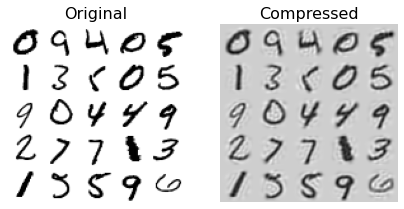

In [37]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)